<a href="https://colab.research.google.com/github/KassenBoyaubay/MPA-MLF-Exercises/blob/main/Finalproject/Finalproject_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MPA-MLF, Finalproject
### *Kassen Boyaubay*

## 0. Import libraries

In [21]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from keras.utils import to_categorical
from keras import layers, Model, Sequential, Input
from keras.callbacks import EarlyStopping

# from keras import regularizers
# from sklearn import preprocessing
# from sklearn import decomposition
# from sklearn.svm import LinearSVC
# from numpy import argmax

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

## 1. Mount Files

In [22]:
drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/Dataset/'
x_train_dir = os.path.join(base_dir, 'Train/Color/')
x_test_dir = os.path.join(base_dir, 'Test/Color/')
y_train_dir = os.path.join(base_dir, 'y_train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Data examination

### 2.1 Size of the dataset

In [23]:
print('total training images:', len(os.listdir(x_train_dir)))
print('total test images:', len(os.listdir(x_test_dir)))

total training images: 8279
total test images: 3562


### 2.2 Explore the image

Image shape:  (539, 682, 3)


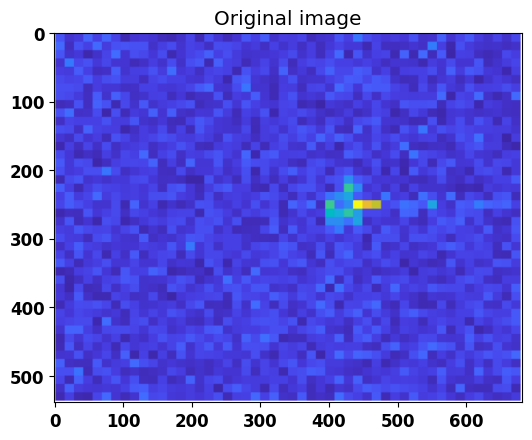

In [34]:
img = np.asarray(Image.open(x_train_dir + 'img_0.png'))

plt.imshow(img)
plt.title('Original image')

print('Image shape: ', img.shape)

### 2.3 Explore the labels

In [25]:
y_train = pd.read_csv(y_train_dir)
print(y_train.iloc[0:4])
print('y_train shape:', y_train.shape)
print('\ny_train unique values:', y_train['target'].unique())
print('labels:', len(y_train['target'].unique()))

   id  target
0   0       1
1   1       3
2   2       1
3   3       1
y_train shape: (8279, 2)

y_train unique values: [1 3 2]
labels: 3


### from csv try

In [44]:
a = pd.read_csv('/content/drive/MyDrive/Dataset/Train/CSV/img_0.csv').values
a = np.delete(a, 0, 1)
a

array([[ 40.809 ,  25.751 ,  89.378 , ..., 104.78  ,  51.486 ,   7.3866],
       [ 35.794 ,  24.56  ,  37.289 , ...,  79.366 ,  56.694 ,  63.145 ],
       [ 16.8   ,  14.145 ,  51.555 , ...,  31.332 ,  24.686 ,  21.428 ],
       ...,
       [ 62.486 ,  74.848 ,  41.44  , ...,  23.319 ,  59.134 ,  64.447 ],
       [ 11.689 ,  13.603 ,  60.658 , ...,  22.591 ,  43.078 ,  32.451 ],
       [ 80.212 ,  27.695 ,  17.801 , ...,  60.717 ,  30.785 ,  82.938 ]])

In [45]:
x_train_dir_csv = os.path.join(base_dir, 'Train/CSV/')
x_test_dir_csv = os.path.join(base_dir, 'Test/CSV/')

In [46]:
x_train = []
for filename in os.listdir(x_train_dir_csv):
  a = pd.read_csv(os.path.join(x_train_dir_csv, filename)).values
  a = np.delete(a, 0, 1)
  x_train.append(a)

In [47]:
x_test = []
for filename in os.listdir(x_test_dir_csv):
  a = pd.read_csv(os.path.join(x_test_dir_csv, filename)).values
  a = np.delete(a, 0, 1)
  x_test.append(a)

In [53]:
x_train = np.array(x_train)
x_test = np.array(x_test)

## 3. Data preprocessing

### Compression

In [29]:
resize = (50, 50)

In [30]:
zoom = 0

In [31]:
(img_height, img_width, _) = img.shape
top = round(zoom*img_height/2)
left = round(zoom*img_width/2)
bottom = img_height - top
right = img_width - left

In [32]:
crop_sizes = (left, top, right, bottom)

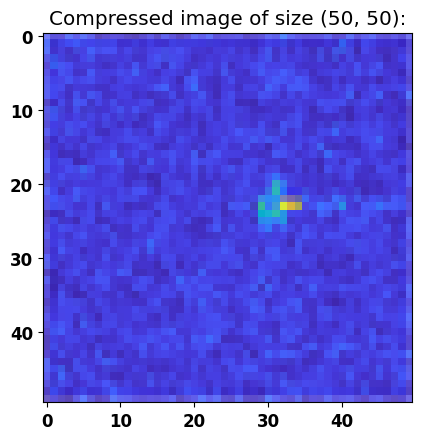

In [36]:
plt.imshow(np.asarray(Image.open(x_train_dir + 'img_0.png').crop(crop_sizes).resize(resize, Image.ANTIALIAS)))
plt.title('Compressed image of size ' + str(resize) + ':')
print()

### Zoom

### 3.1 x_train preprocessing

In [38]:
x_train_dir_filenames = os.listdir(x_train_dir)
x_train = []
for filename in x_train_dir_filenames:
  x_train.append(np.asarray(Image.open(x_train_dir + filename).crop(crop_sizes).resize(resize, Image.ANTIALIAS)))
x_train = np.array(x_train)
print(x_train.shape)

(8279, 50, 50, 3)


#### Normalize x_train

In [ ]:
x_train = x_train.astype('float32')
x_train /= 255

#### Save x_train

In [ ]:
# save numpy array as npz file
from numpy import savez_compressed
# save to npy file
savez_compressed('/content/drive/MyDrive/x_train_160_zoom_compr_norm.npz', x_train)

#### Load x_train

In [ ]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('/content/drive/MyDrive/x_train_160_zoom_compr_norm.npz')
# extract the first array
x_train = dict_data['arr_0']

### 3.2 x_test preprocessing

In [39]:
x_test_dir_filenames = os.listdir(x_test_dir)
x_test = []
for filename in x_test_dir_filenames:
  x_test.append(np.asarray(Image.open(x_test_dir + filename).crop(crop_sizes).resize(resize, Image.ANTIALIAS)))
x_test = np.array(x_test)
print(x_test.shape)

(3562, 50, 50, 3)


#### Normalize x_test

In [ ]:
x_test = x_test.astype('float32')
x_test /= 255

#### Save x_test

In [ ]:
# save numpy array as npz file
from numpy import savez_compressed
# save to npy file
savez_compressed('/content/drive/MyDrive/x_test_160_zoom_compr_norm.npz', x_test)

#### Load x_test

In [ ]:
# load numpy array from npz file
from numpy import load
# load dict of arrays
dict_data = load('/content/drive/MyDrive/x_test_160_zoom_compr_norm.npz')
# extract the first array
x_test = dict_data['arr_0']

### 3.3 y_train preprocessing

In [40]:
num_classes = len(y_train['target'].unique())
y_train_encoded = to_categorical(y_train['target'].values-1, num_classes).astype('int32')
print('"target" values as array: ', y_train['target'].values)
print('one-hot encoded: \n', y_train_encoded)

"target" values as array:  [1 3 1 ... 2 1 2]
one-hot encoded: 
 [[1 0 0]
 [0 0 1]
 [1 0 0]
 ...
 [0 1 0]
 [1 0 0]
 [0 1 0]]


## 4. CNN model

### 4.1 Build CNN model

In [64]:
x_train_x = np.expand_dims(x_train, axis=-1)
x_test_x = np.expand_dims(x_test, axis=-1)

In [69]:
input_shape = resize + (3, )
input_shape = (44, 51, 1)
model = Sequential(
    [
        Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 42, 49, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 21, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 21, 24, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 19, 22, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 9, 11, 64)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 9, 11, 64)        

### 4.2 Train CNN model

In [50]:
callbacks = [
        EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-3,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=25,
        verbose=1)
]

In [70]:
batch_size = 128
epochs = 100

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

history = model.fit(x_train_x, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.15, verbose=2)

Epoch 1/100
55/55 - 3s - loss: 25.0194 - accuracy: 0.3681 - val_loss: 1.1198 - val_accuracy: 0.4082 - 3s/epoch - 57ms/step
Epoch 2/100
55/55 - 1s - loss: 1.2912 - accuracy: 0.3818 - val_loss: 1.0862 - val_accuracy: 0.4332 - 657ms/epoch - 12ms/step
Epoch 3/100
55/55 - 1s - loss: 1.1900 - accuracy: 0.4107 - val_loss: 1.0832 - val_accuracy: 0.4404 - 644ms/epoch - 12ms/step
Epoch 4/100
55/55 - 1s - loss: 1.1445 - accuracy: 0.4176 - val_loss: 1.0767 - val_accuracy: 0.4477 - 662ms/epoch - 12ms/step
Epoch 5/100
55/55 - 1s - loss: 1.1070 - accuracy: 0.4425 - val_loss: 1.0757 - val_accuracy: 0.4485 - 636ms/epoch - 12ms/step
Epoch 6/100
55/55 - 1s - loss: 1.0888 - accuracy: 0.4488 - val_loss: 1.0731 - val_accuracy: 0.4485 - 641ms/epoch - 12ms/step
Epoch 7/100
55/55 - 1s - loss: 1.0853 - accuracy: 0.4414 - val_loss: 1.0719 - val_accuracy: 0.4501 - 665ms/epoch - 12ms/step
Epoch 8/100
55/55 - 1s - loss: 1.0792 - accuracy: 0.4458 - val_loss: 1.0709 - val_accuracy: 0.4501 - 645ms/epoch - 12ms/step
Ep

### 4.3 Evaluate trained CNN model

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('n epochs')
plt.ylabel('loss')

## 5. Model prediction

In [ ]:
y_pred_enc = model.predict(x_test)

ValueError: in user code:

    File "c:\users\user\desktop\folders\study\python\vscodeprojects\dataanalysisfreecodecamp\.venv\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\users\user\desktop\folders\study\python\vscodeprojects\dataanalysisfreecodecamp\.venv\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\user\desktop\folders\study\python\vscodeprojects\dataanalysisfreecodecamp\.venv\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\users\user\desktop\folders\study\python\vscodeprojects\dataanalysisfreecodecamp\.venv\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\users\user\desktop\folders\study\python\vscodeprojects\dataanalysisfreecodecamp\.venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\user\desktop\folders\study\python\vscodeprojects\dataanalysisfreecodecamp\.venv\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(None, 128, 128, 3)


## 6. Export to CSV

In [ ]:
indexes = argmax(y_pred_enc, axis=1)
y_pred = indexes + 1

In [ ]:
y_pred_postpr = pd.DataFrame({'id': np.arange(0, len(y_pred)), 'target': y_pred})

In [ ]:
y_pred_postpr.to_csv('y_pred_mlp.csv', index=False)